参考资料：https://zhuanlan.zhihu.com/p/88729124

算法工程师是伴随着人工智能火起来的一个领域。听着名字似乎门槛很高。但是，得益于Python生态下的包共享机制，机器模型构建的过程其实已经变得非常简单了，很多听起来牛逼的算法，其实根本不需要自己实现，甚至都不需要知道这些算法的具体原理。

你只需要两步就能构建起自己的机器学习模型：

1. 明确你需要解决的问题是什么类型，以及知道解决该类型问题所对应的算法。
2. 从skicit-learn中调用相应的算法构建模型即可。是的！在机器学习领域，如果你只是抱着体验机器学习的心态，实现起来就是这么简单。

## 第一步很好解决
常见的问题类型只有三种：分类、回归、聚类。而明确具体问题对应的类型也很简单。比如，如果你需要通过输入数据得到一个类别变量，那就是分类问题。分成两类就是二分类问题，分成两类以上就是多分类问题。常见的有：判别一个邮件是否是垃圾邮件、根据图片分辩图片里的是猫还是狗等等。

如果你需要通过输入数据得到一个具体的连续数值，那就是回归问题。比如：预测某个区域的房价等。

常用的分类和回归算法算法有：SVM (支持向量机) 、xgboost、, KNN、LR算法、SGD (随机梯度下降算法)、Bayes (贝叶斯估计)以及随机森林等。这些算法大多都既可以解分类问题，又可以解回归问题。

如果你的数据集并没有对应的属性标签，你要做的，是发掘这组样本在空间的分布, 比如分析哪些样本靠的更近，哪些样本之间离得很远, 这就是属于聚类问题。常用的聚类算法有k-means算法。

在本文中，我们主要解决第二步：通过skicit-learn构建模型。告诉你你一套让你简单到想笑的通用模型构建模板。只要scikit-learn实现的算法，都可以通过这种方式快速调用。牢记这三个万能模板，你就能轻松构建起自己的机器学习模型。

## 预备工作
在介绍万能模板之前，为了能够更深刻地理解这三个模板，我们加载一个Iris（鸢尾花）数据集来作为应用万能模板的小例子，Iris数据集在前边的文章中已经提到过多次了，这里不再赘述。它是一个典型的多分类问题。加载步骤如下：
### 1、加载数据集
因为原始的数据集中包含很多空值，而且类别特征用英文名表示各个花的名字，也需要我们转换成数字。
在scikit-learn下的datasets子包里，也自带了一个Iris数据集，这个数据集和原始数据集的区别就是scikit-learn已经帮我们提前处理好了空值等问题，可以直接输入模型用来训练。所以为了方便起见，我们直接使用scikit-learn的数据集。加载方法如下：

In [1]:
from sklearn.datasets import load_iris
data = load_iris()
x = data.data
y = data.target

x值如下，可以看到scikit-learn把数据集经过去除空值处理放在了array里，所以x是一个（150,4）的数组，保存了150个数据的4个特征：

In [2]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

y值如下，共有150行，其中0、1、2分别代表三类花：

In [3]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 2、数据集拆分
数据集拆分是为了验证模型在训练集和测试集是否过拟合，使用train_test_split的目的是保证从数据集中均匀拆分出测试集。这里，简单把10%的数据集拿出来用作测试集。

In [4]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.1,random_state=0)

## 万能模板V1.0

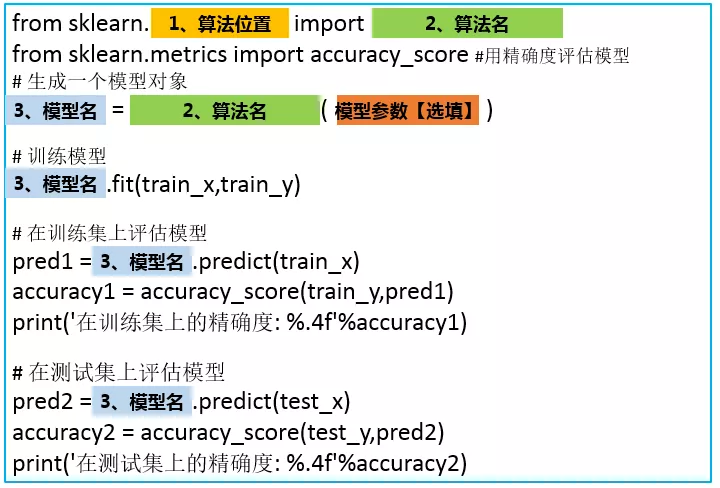

不同的算法只是改变了名字，以及模型的参数不同而已。
有了这个万能模板，接下来就是简单的复制粘贴改名字了：
而且在scikit-learn中，每个包的位置都是有规律的，比如：随机森林就是在集成学习文件夹下。

### 模板1.0应用案例
#### 1、构建SVM分类模型
通过查阅资料，我们知道svm算法在scikit-learn.svm.SVC下，所以：1）算法位置填入：svm，2）算法名填入：SVC() ,3）模型名自己起，这里我们就叫svm_model。

套用模板得到程序如下：

In [5]:
# svm分类器

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_model = SVC()

svm_model.fit(train_x,train_y)

pred1 = svm_model.predict(train_x)
accuracy1 = accuracy_score(train_y,pred1)
print('在训练集上的精确度: %.4f'%accuracy1)

pred2 = svm_model.predict(test_x)
accuracy2 = accuracy_score(test_y,pred2)
print('在测试集上的精确度: %.4f'%accuracy2)

在训练集上的精确度: 0.9630
在测试集上的精确度: 1.0000


#### 2、构建LR分类模型
同理，找到LR算法在sklearn.linear_model.LogisticRegression下，所以：1）算法位置填入：linear_model，2）算法名填入：`LogisticRegression` ,3）模型名叫做：lr_model。

程序如下：

套用模板得到程序如下：

In [6]:
# LogisticRegression分类器

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score #评分函数用精确度评估

lr_model = LogisticRegression()

lr_model.fit(train_x,train_y)

pred1 = lr_model.predict(train_x)
accuracy1 = accuracy_score(train_y,pred1)
print('在训练集上的精确度: %.4f'%accuracy1)

pred2 = lr_model.predict(test_x)
accuracy2 = accuracy_score(test_y,pred2)
print('在测试集上的精确度: %.4f'%accuracy2)

在训练集上的精确度: 0.9704
在测试集上的精确度: 1.0000


## 万能模板V2.0版
### 加入交叉验证，让算法模型评估更加科学
在1.0版的模板中，当你多次运行同一个程序就会发现：每次运行得到的精确度并不相同，而是在一定范围内浮动，这是因为数据输入模型之前会进行选择，每次训练时数据输入模型的顺序都不一样。所以即使是同一个程序，模型最后的表现也会有好有坏。

更糟糕的是，有些情况下，在训练集上，通过调整参数设置使模型的性能达到了最佳状态，但在测试集上却可能出现过拟合的情况。这个时候，我们在训练集上得到的评分不能有效反映出模型的泛化性能。

为了解决上述两个问题，还应该在训练集上划分出验证集(validation set)并结合交叉验证来解决。首先，在训练集中划分出不参与训练的验证集，只是在模型训练完成以后对模型进行评估，接着再在测试集上进行最后的评估。

但这样大大减少了可用于模型学习的样本数量，所以还需要采用交叉验证的方式多训练几次。比如说最常用的k-折交叉验证如下图所示，它主要是将训练集划分为 k 个较小的集合。然后将k-1份训练子集作为训练集训练模型，将剩余的 1 份训练集子集作为验证集用于模型验证。这样需要训练k次，最后在训练集上的评估得分取所有训练结果评估得分的平均值。
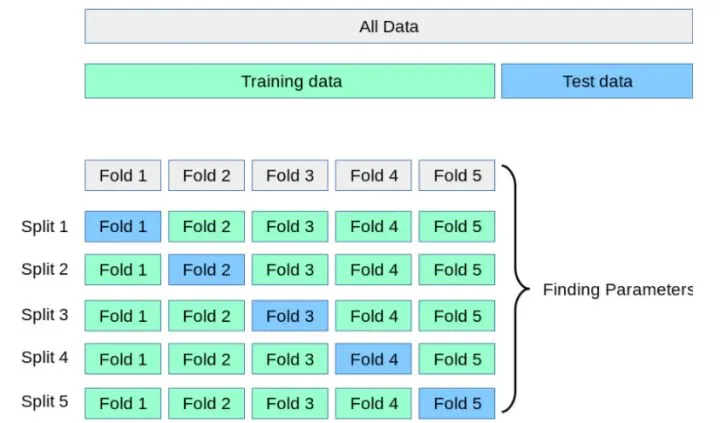
这样一方面可以让训练集的所有数据都参与训练，另一方面也通过多次计算得到了一个比较有代表性的得分。唯一的缺点就是计算代价很高，增加了k倍的计算量。

原理就是这样，但理想很丰满，现实很骨干。在自己实现的时候却有一个很大的难题摆在面前：怎么能够把训练集均匀地划分为K份？

这个问题不用思考太多，既然别忘了，我们现在是站在巨人的肩膀上，scikit-learn已经将优秀的数学家所想到的均匀拆分方法和程序员的智慧融合在了cross_val_score() 这个函数里了，只需要调用该函数即可，不需要自己想什么拆分算法，也不用写for循环进行循环训练。

万能模板2.0如下：
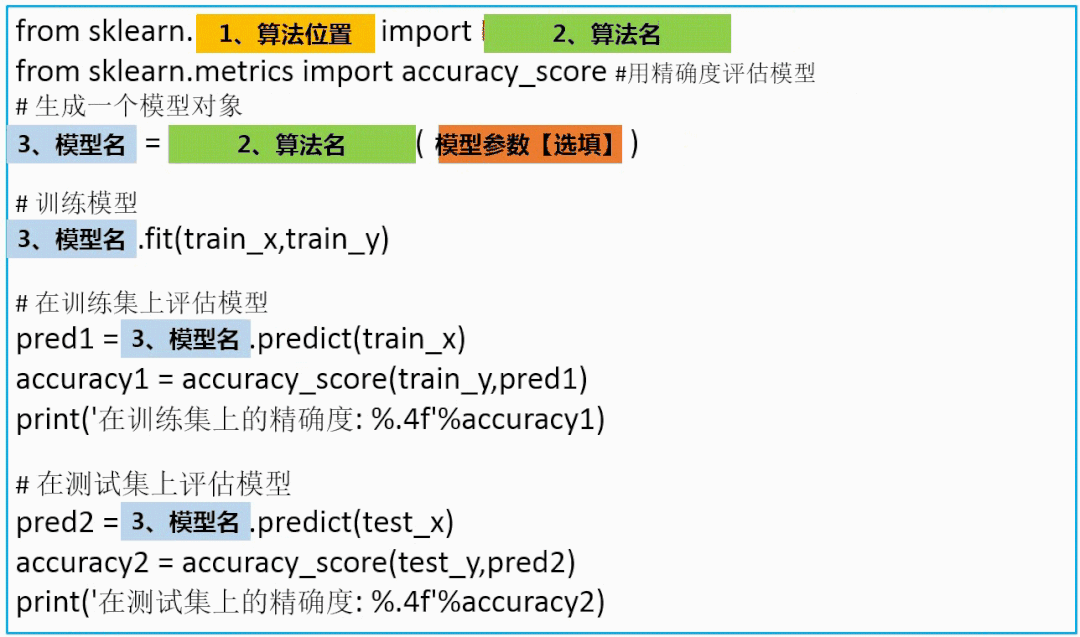
把模型、数据、划分验证集的个数一股脑输入函数，函数会自动执行上边所说的过程。

在求精确度的时候，我们可以简单地输出平均精确度：

In [7]:
# 输出精确度的平均值
# print("训练集上的精确度: %0.2f " % scores1.mean())

但是既然我们进行了交叉验证，做了这么多计算量，单求一个平均值还是有点浪费了，可以利用下边代码捎带求出精确度的置信度：

In [8]:
# 输出精确度的平均值和置信度区间
# print("训练集上的平均精确度: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std() * 2))

### 模板2.0应用案例：
#### 1、构建SVM分类模型
程序如下：

In [9]:
### svm分类器

from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(train_x,train_y)

scores1 = cross_val_score(svm_model,train_x,train_y,cv=5, scoring='accuracy')
# 输出精确度的平均值和置信度区间
print("训练集上的精确度: %0.2f (+/- %0.2f)" % (scores1.mean(), scores1.std() * 2))

scores2 = cross_val_score(svm_model,test_x,test_y,cv=5, scoring='accuracy')
# 输出精确度的平均值和置信度区间
print("测试集上的平均精确度: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std() * 2))


print(scores1)
print(scores2)

训练集上的精确度: 0.96 (+/- 0.07)
测试集上的平均精确度: 0.73 (+/- 0.27)
[0.96296296 0.92592593 1.         1.         0.92592593]
[0.66666667 0.66666667 0.66666667 0.66666667 1.        ]


C:\dev\Anaconda3\envs\seafy_37\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,


#### 2、构建LR分类模型

In [10]:
# LogisticRegression分类器

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


lr_model = LogisticRegression()
lr_model.fit(train_x,train_y)

scores1 = cross_val_score(lr_model,train_x,train_y,cv=5, scoring='accuracy')
# 输出精确度的平均值和置信度区间
print("训练集上的精确度: %0.2f (+/- %0.2f)" % (scores1.mean(), scores1.std() * 2))

scores2 = cross_val_score(lr_model,test_x,test_y,cv=5, scoring='accuracy')
# 输出精确度的平均值和置信度区间
print("测试集上的平均精确度: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std() * 2))

print(scores1)
print(scores2)

训练集上的精确度: 0.96 (+/- 0.09)
测试集上的平均精确度: 0.80 (+/- 0.33)
[0.96296296 0.88888889 1.         1.         0.92592593]
[0.66666667 0.66666667 1.         0.66666667 1.        ]


C:\dev\Anaconda3\envs\seafy_37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\dev\Anaconda3\envs\seafy_37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

注： 如果想要一次性评估多个指标，也可以使用可以一次性输入多个评估指标的 cross_validate()函数。

## 万能模板V3.0
### 调参让算法表现更上一层楼
以上都是通过算法的默认参数来训练模型的，不同的数据集适用的参数难免会不一样，自己设计算法是设计不来的，只能调调参这样子，调参，是广大算法工程师最后的尊严。再说，若是做算法不调参，岂不是辱没了算法工程师在江湖上大名鼎鼎的“炼丹工程师”的名声？

scikit-learn对于不同的算法也提供了不同的参数可以自己调节。如果细说起来，又能写好几篇文章，本文目的是构建一个万能算法框架构建模板，所以，这里只介绍一下一个通用的自动化调参方法，至于更细节的每个算法对应参数的含义以及手动调参方法，会在以后的文章中结合实例具体慢慢介绍。

首先要明确的是，scikit-learn提供了算法().get_params()方法来查看每个算法可以调整的参数，比如说，我们想查看SVM分类器算法可以调整的参数，可以：

In [11]:
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

输出的就是SVM算法可以调节的参数以及系统默认的参数值。每个参数的具体含义会在以后的文章中介绍。

接着，就可以引出我们的V3.0版万能模板了。
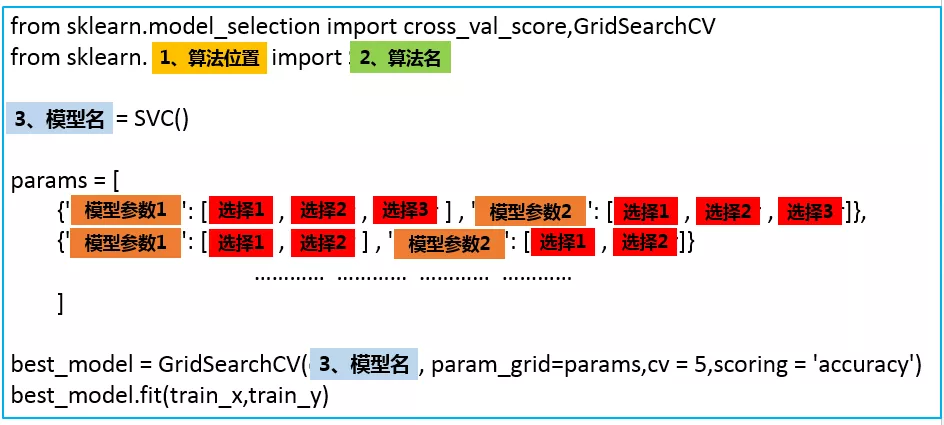
参数的形式如下：
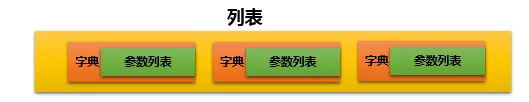

程序就会按照顺序测试这几个参数的组合效果，根本不需要自己辛辛苦苦实现。写到这里，感谢各为大佬编写了scikit-learn这么方便的机器学习包。忽然就想到了一句话：哪有什么岁月静好，只是因为有人替你负重前行。

看到这里，可能有人会有疑惑：为什么要采用列表、字典、列表三层嵌套的方式呢？params直接是字典的形式不行吗？答案是：行，但是不好。

让我们先算一个小的数学题：假如我们要调节n个参数，每个参数有4个备选值。那么程序就会训练  。当n为10的时候， ，这是一个对于计算机来说庞大的计算量。而当我们将这10个参数拆分成5组，每次只调节两个参数，其他参数采用默认值，那么计算量就是  ，计算量会大大减少。

列表的作用这是如此，保证了每次只调节列表中的一个字典中的参数。

运行之后，best_model就是我们得到的最优模型，可以利用这个模型进行预测。

当然，best_model 还有好多好用的属性：

- best_model.cv_results_：可以查看不同参数情况下的评价结果。
- best_model.param_ :得到该模型的最优参数
- best_model.best_score_: 得到该模型的最后评分结果

### 模板3.0应用案例
#### 实现SVM分类器

In [12]:
###1、svm分类器
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.svm import SVC

svm_model = SVC()

params = [
        {'kernel': ['linear'], 'C': [1, 10, 100, 100]},
        {'kernel': ['poly'], 'C': [1], 'degree': [2, 3]},
        {'kernel': ['rbf'], 'C': [1, 10, 100, 100], 'gamma':[1, 0.1, 0.01, 0.001]}
        ]


best_model = GridSearchCV(svm_model, param_grid=params,cv = 5,scoring = 'accuracy')
best_model.fit(train_x,train_y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 100], 'kernel': ['linear']},
                         {'C': [1], 'degree': [2, 3], 'kernel': ['poly']},
                         {'C': [1, 10, 100, 100],
                          'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}],
             scoring='accuracy')

1）查看最优得分：

In [13]:
best_model.best_score_

0.9555555555555555

2）查看最优参数：

In [14]:
best_model.best_params_ 

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

3）查看最优模型的所有参数：

In [15]:
best_model.best_estimator_ 

SVC(C=1, gamma=0.1)

这个函数会显示出没有调参的参数，便于整体查看模型的参数。

4）查看每个参数的交叉验证结果：

In [16]:
best_model.cv_results_

{'mean_fit_time': array([0.00040002, 0.00039997, 0.00019999, 0.00020065, 0.00039988,
        0.00039868, 0.00039997, 0.00040021, 0.00039988, 0.00100012,
        0.00040016, 0.00019994, 0.00039997, 0.00020008, 0.00040035,
        0.00040007, 0.00020003, 0.00040002, 0.00040002, 0.00040002,
        0.00019999, 0.00019989]),
 'std_fit_time': array([4.89920847e-04, 4.89867663e-04, 3.99971008e-04, 4.01306152e-04,
        4.89745640e-04, 4.88285916e-04, 4.89862534e-04, 4.90154449e-04,
        4.89745640e-04, 4.62310777e-07, 4.90096043e-04, 3.99875641e-04,
        4.89862464e-04, 4.00161743e-04, 4.90330780e-04, 4.89979242e-04,
        4.00066376e-04, 4.89920847e-04, 4.89920847e-04, 4.89920894e-04,
        3.99971008e-04, 3.99780273e-04]),
 'mean_score_time': array([0.00039926, 0.        , 0.00019994, 0.00020013, 0.        ,
        0.        , 0.        , 0.00019994, 0.00039992, 0.        ,
        0.00039992, 0.00019994, 0.00020003, 0.00039997, 0.        ,
        0.00019994, 0.00019994, 0.  

注：
1、以前版本是best_model.grid_scores_，现在已经移除
2、这个函数输出很多数据，不方便查看，一般不用
在实际使用中，如果计算资源够用，一般采用第三种万能公式。如果，为了节约计算资源尽快算出结果，也会采用以后介绍的手动调参方式。

当然，本文为了说明万能模板的使用方法，在Iris数据集上将所有算法都实现了一遍，在实际应用中，如果项目时间紧急，根据自己的需求和数据量级选择一个合适的算法使用即可。具体怎么选择，scikit-learn官方非常贴心地画了一个图，供大家根据数据量和算法类型选择合适的模型，这副图建议收藏：
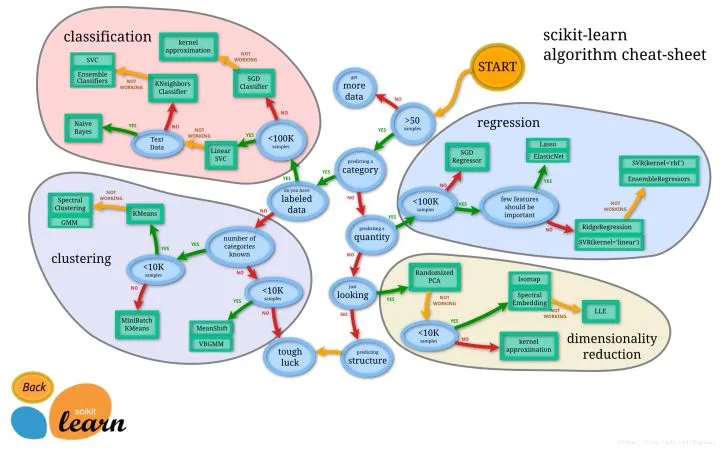